In [1]:
import yfinance as yf
import numpy as np
from scipy.stats import norm
import pandas as pd
import matplotlib.pyplot as plt

# Tesco PLC Data over the period of two years

In [2]:
import yfinance as yf  # Import the yfinance module and alias it as yf

# Define the stock ticker symbol (Tesco in this case)
ticker_symbol = "TSCO"

# Set the start and end dates for the data
end_date = '2023-11-30'
start_date = '2021-01-30'

# Download historical stock data
stock_data = yf.download(ticker_symbol, start=start_date, end=end_date)

# Extract the 'Adj Close' column and round the values
stock_data = stock_data['Adj Close'].round(4)

# Print or do further processing with the downloaded stock data
print(stock_data)

[*********************100%%**********************]  1 of 1 completed
Date
2021-02-01    133.1144
2021-02-02    136.4108
2021-02-03    138.0876
2021-02-04    139.3261
2021-02-05    144.3374
                ...   
2023-11-22    197.4100
2023-11-24    198.1900
2023-11-27    197.7800
2023-11-28    199.9200
2023-11-29    200.1900
Name: Adj Close, Length: 713, dtype: float64


# Descriptive Statistics for Adjusted Closing Price

In [64]:
# Descriptive statistice for Adjusted Closing Price
stock_data.describe()

count    713.000000
mean     201.159379
std       21.058211
min      133.114400
25%      186.056400
50%      202.312100
75%      217.629800
max      246.270400
Name: Adj Close, dtype: float64

# Computational of Log return and Descriptives Statistics

In [ ]:
# Computation of Log Returns
log_returns=np.log(stock_data/stock_data.shift(1))
log_returns

In [5]:
# Descriptive statistice for log returns
log_returns.describe()

count    712.000000
mean       0.000573
std        0.018227
min       -0.133738
25%       -0.008435
50%        0.000886
75%        0.011310
max        0.058581
Name: Adj Close, dtype: float64

# Figure of Stock Prices and Log Return

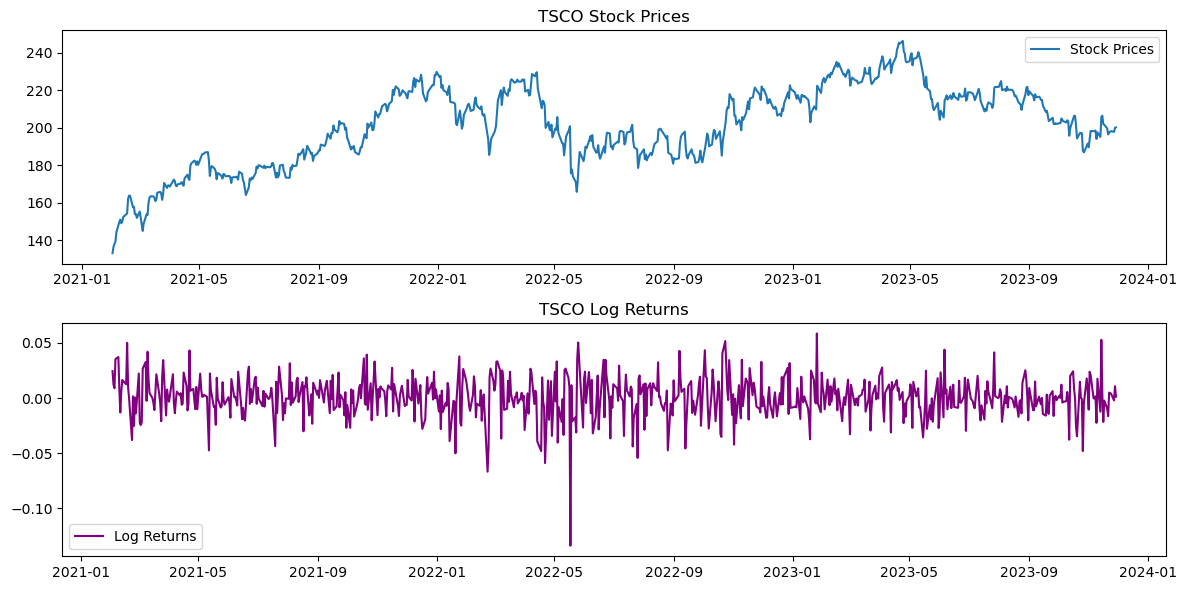

In [6]:
# Plot stock prices
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(stock_data, label='Stock Prices')
plt.title(f'{ticker_symbol} Stock Prices')
plt.legend()

# Plot log returns
plt.subplot(2, 1, 2)
plt.plot(log_returns, label='Log Returns', color='purple')
plt.title(f'{ticker_symbol} Log Returns')
plt.legend()

# Display the plots
plt.tight_layout()
plt.show()

# Calculate annulized volatility

In [7]:
# Calculate annualized volatility
num_years=2
num_days=504
annualised_log_return=(1+log_returns.mean())**(1/num_years)-1
annualised_log_return

0.0002865165431122918

In [8]:
daily_volatility=log_returns.std()
annualised_volatility=daily_volatility*np.sqrt(num_days/num_years)
print(daily_volatility)
print(annualised_volatility)


0.0182271537419344
0.28934709545819276


 # Definition of the option parameters

In [9]:
# Assume a constant risk-free rate and volatility for simplicity (you may want to estimate these values more accurately)
risk_free_rate = 0.0418  # 4% annual risk-free rate according to UK Bpnd Yields 
annualised_volatility=0.28


# Define the option parameters
strike_price = 220  # Example strike price
time_to_expiration = 1.0  # 30 days to expiration (you may want to adjust this)
stock_price=stock_data.iloc[-1]
stock_price

200.19

# Black Scholes Merton European Model

In [21]:
from scipy.stats import norm
import numpy as np

def black_scholes_merton_put(stock_price, strike_price, time_to_expiration, risk_free_rate, annualised_volatility):
    d1 = (np.log(stock_price / strike_price) + (risk_free_rate + 0.5 * annualised_volatility**2) * time_to_expiration) / (annualised_volatility * np.sqrt(time_to_expiration))
    d2 = d1 - annualised_volatility * np.sqrt(time_to_expiration)
    
    put_price = strike_price * np.exp(-risk_free_rate * time_to_expiration) * norm.cdf(-d2) - stock_price * norm.cdf(-d1)
    
    return put_price

# Assume constant risk-free rate and volatility
risk_free_rate = 0.0418
annualised_volatility = 0.28

# Option parameters
strike_price = 220
time_to_expiration = 1.0  # In years
stock_price = stock_data.iloc[-1]  # Use the last stock price

# Calculate put price using Black-Scholes-Merton formula
put_price = black_scholes_merton_put(stock_price, strike_price, time_to_expiration, risk_free_rate, annualised_volatility)

print("Put price:", put_price)

Put price: 28.69175130591239


# Monte Carlo Simulated Stock

In [11]:
def monte_carlo(number):
    
    time_frame=int(12*time_to_expiration)
    dt= time_to_expiration/time_frame

    st_stock=np.zeros((time_frame+1,number))
    st_stock[0]=stock_price
    rn=np.random.standard_normal(st_stock.shape)

    for t in range(1,time_frame+1):
        st_stock[t]=st_stock[t-1]*np.exp((risk_free_rate-annualised_volatility**2/2)*dt+annualised_volatility*np.sqrt(dt) *rn[t])
        
    return st_stock

simulated_stocks=monte_carlo(1000)
simulated_stocks

array([[200.19      , 200.19      , 200.19      , ..., 200.19      ,
        200.19      , 200.19      ],
       [191.9361651 , 179.33800374, 191.89166434, ..., 207.1089643 ,
        170.8746822 , 184.75620408],
       [170.32151198, 181.1240421 , 180.75685119, ..., 212.22722913,
        187.71264065, 198.07313849],
       ...,
       [180.80514099, 168.47109043, 129.01838675, ..., 198.0255206 ,
        124.64956741, 220.12234173],
       [183.09771597, 170.44908326, 138.94735258, ..., 210.7211747 ,
        109.60539367, 210.26405464],
       [176.90029055, 166.81328762, 134.73841811, ..., 202.16957765,
        122.7360145 , 226.08822944]])

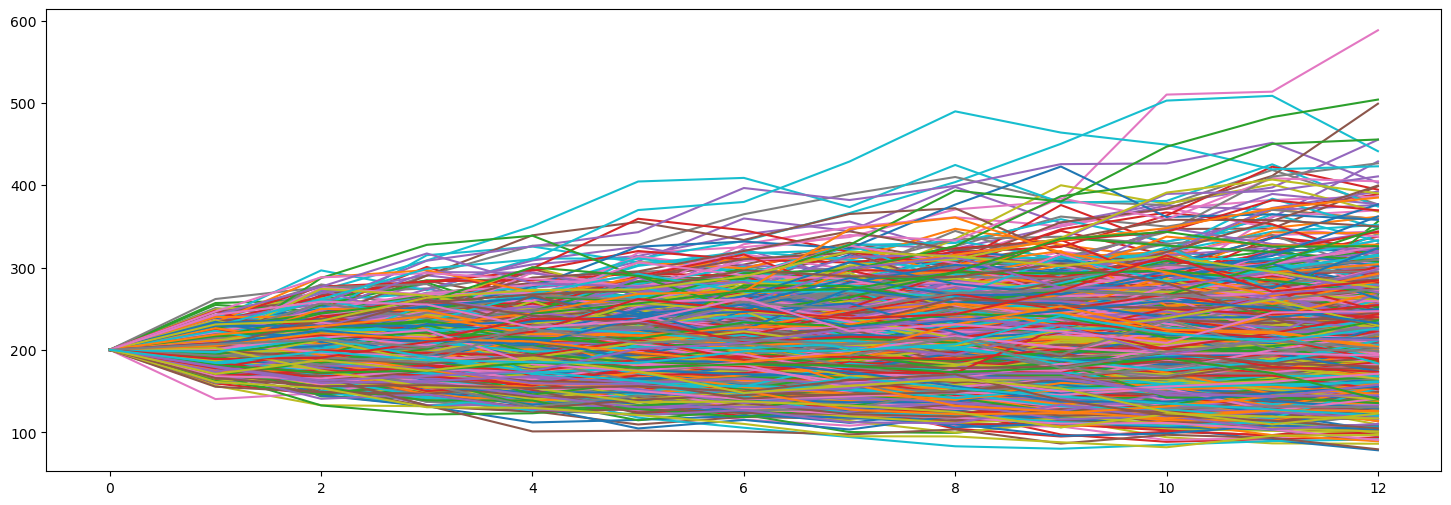

In [12]:
fig = plt.figure(figsize=(18,6))
plt.plot(simulated_stocks)
plt.show()

Text(0.5, 1.0, 'Frequency distribution of the simulated end-of-preiod values')

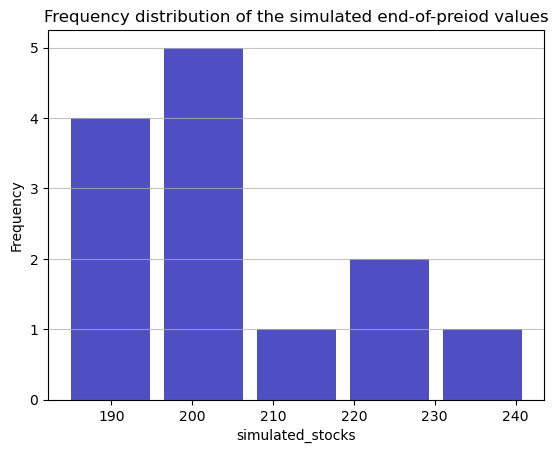

In [13]:
import matplotlib.pyplot as plt
n, bins, patches = plt.hist(x=simulated_stocks[:,-1], bins='auto', color='#0504aa',alpha=0.7, rwidth=0.85)

plt.grid(axis='y', alpha=0.75)
plt.xlabel('simulated_stocks')
plt.ylabel('Frequency')
plt.title('Frequency distribution of the simulated end-of-preiod values')

# Monte Carlo European Put Option 

In [15]:
import numpy as np

def monte_carlo(number):
   time_frame=int(12*time_to_expiration)
   dt= time_to_expiration/time_frame

   st_stock=np.zeros((time_frame+1,number)) 
   st_stock[0]=stock_price
   
   for t in range(1,time_frame+1):
       st_stock[t]=st_stock[t-1]*np.exp((risk_free_rate-annualised_volatility**2/2)*dt+annualised_volatility*np.sqrt(dt) * np.random.standard_normal(size=number)) 
       
   return st_stock
   
# Call monte carlo simulation   
simulated_stocks = monte_carlo(1000) 

strike_price = 220
time_to_expiration = 1

payoffs = np.maximum(strike_price - simulated_stocks[-1,:], 0)   

df = np.exp(-risk_free_rate * time_to_expiration)   

price = df * payoffs.mean() 

print("European Put Option Price: ", round(price, 3))

European Put Option Price:  29.02


# Greeks

## Delta

In [22]:
from scipy.stats import norm
import numpy as np

def delta(stock_price, strike_price, time_to_expiration, risk_free_rate, annualised_volatility, payoff):
    
    d1 = (np.log(stock_price / strike_price) + (risk_free_rate + 0.5 * annualised_volatility ** 2) * time_to_expiration) / (annualised_volatility * np.sqrt(time_to_expiration))
    delta = norm.cdf(d1, 0.0, 1.0) - 1
    
    return delta

# Example usage for a put option with a strike price of 200
stock_price = 200
strike_price_put = 220  # Updated strike price
time_to_expiration = 1.0
risk_free_rate = 0.0418
annualised_volatility = 0.28

put_delta = delta(stock_price, strike_price_put, time_to_expiration, risk_free_rate, annualised_volatility, payoff="put")
print("Put Delta:", put_delta)

Put Delta: -0.5203801837217175


In [23]:
S = np.linspace(50,150,11)
Delta_Put = np.zeros((len(S),1))
for i in range(len(S)):
    Delta_Put [i] = delta(S[i], 100, 1, 0.05, 0.25, 'put')

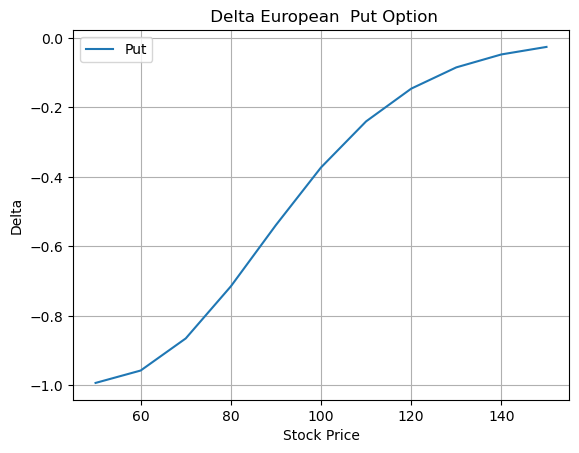

In [30]:
fig = plt.figure()
plt.plot(S, Delta_Put, '-')
plt.grid()
plt.xlabel('Stock Price')
plt.ylabel('Delta')
plt.title(' Delta European  Put Option')
plt.legend(['Put'])

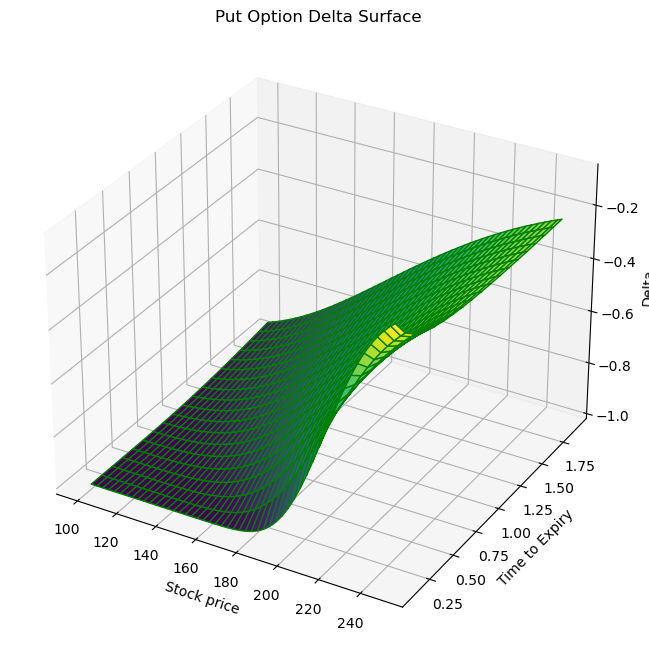

In [57]:
import numpy as np 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import norm

# Input ranges
stock_prices = np.arange(100, 250)
ttm = np.arange(0.1, 2.0, 0.1)

strike_price = 220 
risk_free_rate = 0.0418
volatility = 0.28

# Compute delta 
def delta(S, T):
    d1 = (np.log(S/strike_price)+(risk_free_rate+0.5*volatility**2)*T)/(volatility*np.sqrt(T))  
    return -norm.cdf(-d1)

S, T = np.meshgrid(stock_prices, ttm)
delta_values = delta(S, T)  

# Plot  
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')    

ax.plot_surface(S, T, delta_values, cmap='viridis', edgecolor='green')
ax.set_title('Put Option Delta Surface')
ax.set_xlabel('Stock price')  
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Delta')

plt.show()

## Gamma

In [20]:
import scipy.stats as si

def gamma(Stock_price, strike_price, time_to_expiration, risk_free_rate,  annualised_volatility, payoff):
    
    d1 = (np.log(Stock_price / strike_price) + (risk_free_rate  + 0.5 * annualised_volatility ** 2) * time_to_expiration) / (annualised_volatility * np.sqrt(time_to_expiration))

    gamma = si.norm.pdf(d1, 0.0, 1.0) / (annualised_volatility *  np.sqrt(time_to_expiration) * stock_price)
    return gamma

In [25]:
gamma(200, 220, 1.0, 0.418, 0.28, 'put')

0.003090194148251807

In [26]:
S = np.linspace(50,150,11)
gamma_Put = np.zeros((len(S),1))
for i in range(len(S)):
    gamma_Put [i] = gamma(S[i], 100, 1, 0.05, 0.25, 'put')

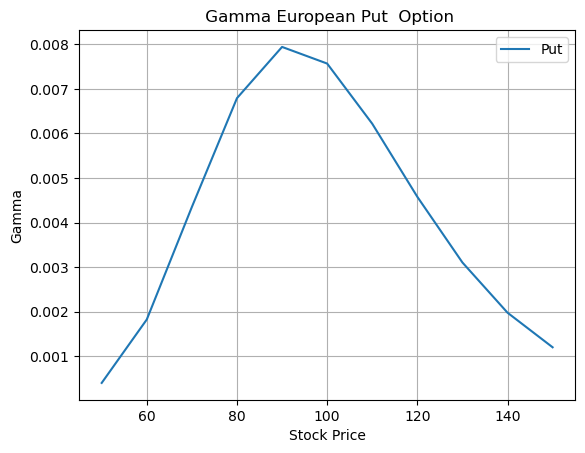

In [29]:
fig = plt.figure()
plt.plot(S, gamma_Put, '-')
plt.grid()
plt.xlabel('Stock Price')
plt.ylabel('Gamma')
plt.title(' Gamma European Put  Option')
plt.legend(['Put'])

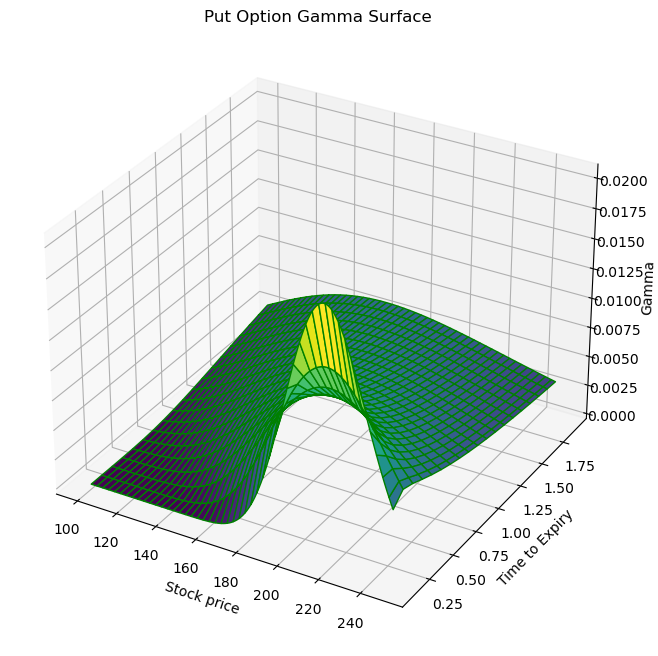

In [58]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  
from scipy.stats import norm 

# Inputs 
stock_prices = np.arange(100, 250)
ttm = np.arange(0.1, 2.0, 0.1)

strike_price = 220
risk_free_rate = 0.0418
volatility = 0.28

# Compute gamma
def gamma(S, T):
    d1 = (np.log(S/strike_price)+(risk_free_rate+0.5*volatility**2)*T)/(volatility*np.sqrt(T)) 
    return norm.pdf(d1) / (S * volatility * np.sqrt(T))

S, T = np.meshgrid(stock_prices, ttm)
gamma_values = gamma(S, T)   

# Plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')   

ax.plot_surface(S, T, gamma_values, cmap='viridis', edgecolor='green')
ax.set_title('Put Option Gamma Surface')
ax.set_xlabel('Stock price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Gamma')

plt.show()

## Theta

In [31]:
def theta(Stock_price, strike_price, time_to_expiration, risk_free_rate, annualised_volatility, payoff):
    d1 = (np.log(Stock_price / strike_price) + (risk_free_rate + 0.5 * annualised_volatility ** 2) * time_to_expiration) / (annualised_volatility * np.sqrt(time_to_expiration))
    d2 = (np.log(Stock_price / strike_price) + (risk_free_rate - 0.5 * annualised_volatility ** 2) * time_to_expiration) / (annualised_volatility * np.sqrt(time_to_expiration))
    N_d1_prime=1/np.sqrt(2 * np.pi) * np.exp(-d1**2/2)
    theta = - Stock_price * N_d1_prime * annualised_volatility / (2 * np.sqrt(time_to_expiration)) + risk_free_rate * strike_price * np.exp(-risk_free_rate * time_to_expiration) * si.norm.cdf(-d2, 0.0, 1.0)
    return theta

In [32]:
theta(200, 220, 1.0, 0.0418, 0.28, 'put')

-5.6019837869898454

In [33]:
S = np.linspace(50,150,11)
theta_Put = np.zeros((len(S),1))
for i in range(len(S)):
    theta_Put[i] = theta(S[i], 100, 1, 0.05, 0.25, 'put')

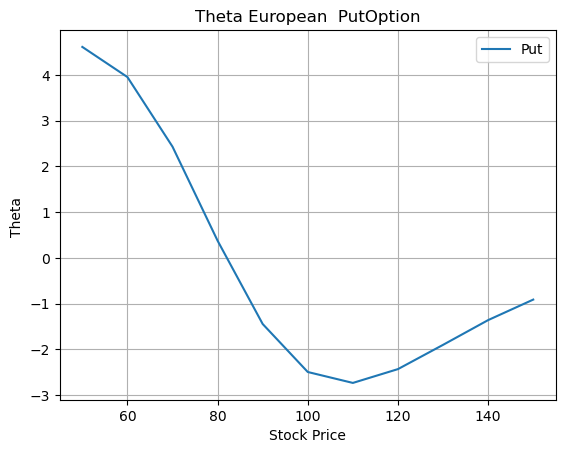

In [35]:
fig = plt.figure()
plt.plot(S, theta_Put, '-')
plt.grid()
plt.xlabel('Stock Price')
plt.ylabel('Theta ')
plt.title('Theta European  PutOption')
plt.legend(['Put'])

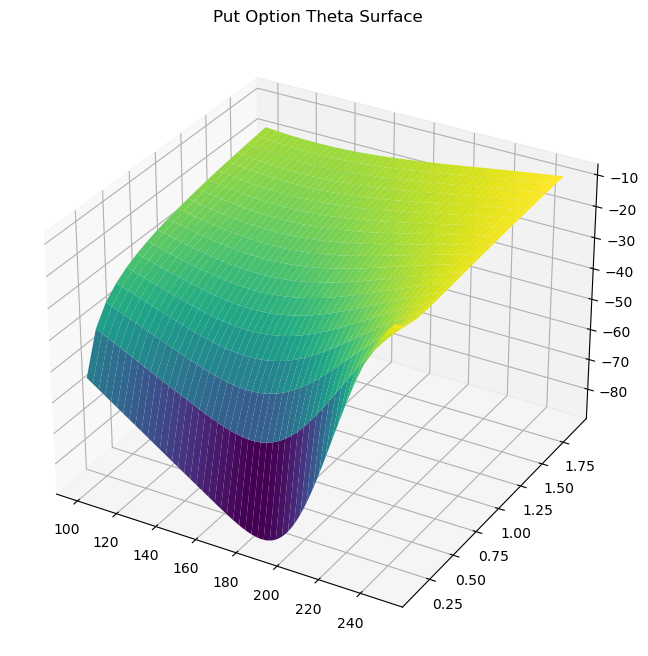

In [60]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 

# Inputs
stock_prices = np.arange(100, 250)  
ttm = np.arange(0.1, 2.0, 0.1)

strike_price = 220
risk_free_rate = 0.0418
volatility = 0.28

# Compute theta   
def theta(S, T):
    d1 = (np.log(S/strike_price)+(risk_free_rate+0.5*volatility**2)*T)/(volatility*np.sqrt(T))
    d2 = d1 - volatility*np.sqrt(T)
    
    theta = (-S*norm.cdf(-d1)*volatility)/(2*np.sqrt(T)) - risk_free_rate*strike_price*np.exp(-risk_free_rate*T)*norm.cdf(-d2)
    return theta

S, T = np.meshgrid(stock_prices, ttm)  
theta_values = theta(S, T)

# Plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(S, T, theta_values, cmap='viridis') 
ax.set_title('Put Option Theta Surface')

plt.show()

## Rho

In [38]:
def rho(S, K, T, r, vol, payoff):
    
    d1 = (np.log(S / K) + (r + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    rho = - K * T * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return rho

In [39]:
rho(200, 220, 1.0, 0.0418, 0.28, 'put')

-132.8665318986958

In [40]:
S = np.linspace(50,150,11)
rho_Put = np.zeros((len(S),1))
for i in range(len(S)):
    rho_Put[i] = rho(S[i], 100, 1, 0.05, 0.25, 'put')

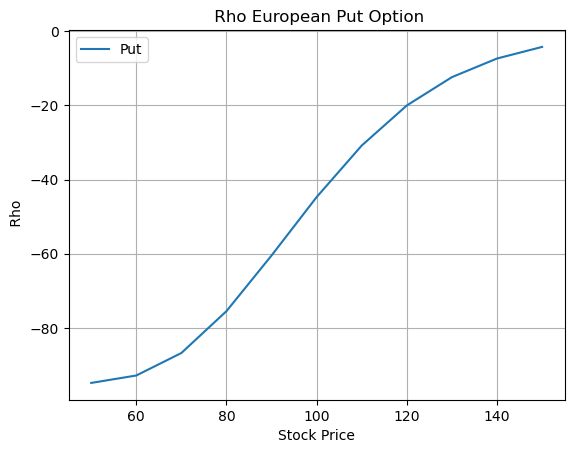

In [41]:
fig = plt.figure()
plt.plot(S, rho_Put, '-')
plt.grid()
plt.xlabel('Stock Price')
plt.ylabel(' Rho')
plt.title(' Rho European Put Option')
plt.legend(['Put'])

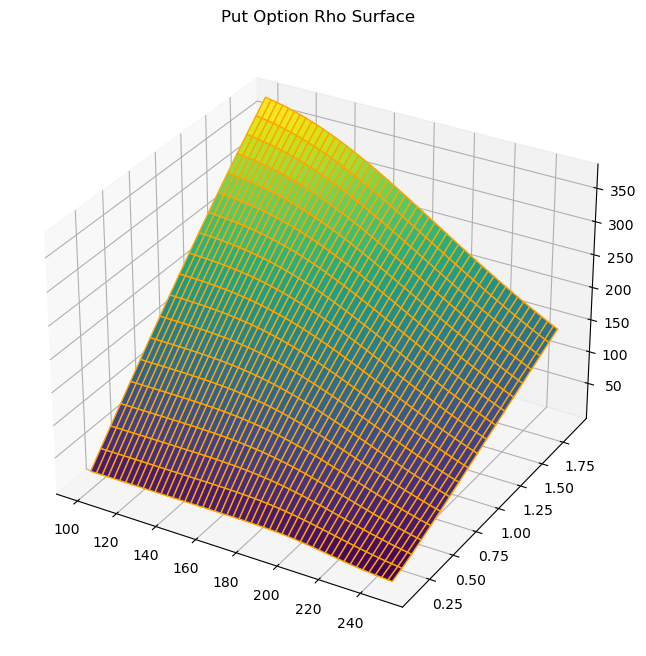

In [62]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import norm

# Inputs
stock_prices = np.arange(100, 250) 
ttm = np.arange(0.1, 2.0, 0.1)

strike_price = 220 
risk_free_rate = 0.0418
volatility = 0.28

# Compute Rho
def rho(S, T):
    d2 = (np.log(S/strike_price)+(risk_free_rate+0.5*volatility**2)*T)/(volatility*np.sqrt(T)) - volatility*np.sqrt(T)
    return strike_price*T*np.exp(-risk_free_rate*T)*norm.cdf(-d2)

S, T = np.meshgrid(stock_prices, ttm)
rho_values = rho(S, T)  

# Plot
fig = plt.figure(figsize=(12, 8)) 
ax = fig.add_subplot(111, projection='3d')  

ax.plot_surface(S, T, rho_values, cmap='viridis', edgecolor='orange')
ax.set_title('Put Option Rho Surface')

plt.show()

## Vega

In [69]:
def vega (S, K, T, r, vol, payoff):
    d1 = (np.log(S / K) + (r + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    N_d1_prime=1/np.sqrt(2 * np.pi) * np.exp(-d1**2/2)
    vega = S * np.sqrt(T) * N_d1_prime
    
    return vega

In [70]:
vega (200, 220, 1.0, 0.0418, 0.28, 'put')

79.6843201453952

In [53]:
S = np.linspace(50,150,11)
vega_Put = np.zeros((len(S),1))
for i in range(len(S)):
    vega_Put[i] = vega(S[i], 100, 1, 0.05, 0.25, 'put')

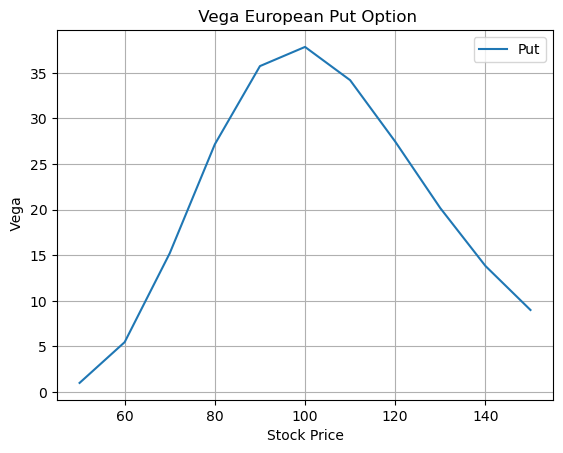

In [54]:
fig = plt.figure()
plt.plot(S, vega_Put, '-')
plt.grid()
plt.xlabel('Stock Price')
plt.ylabel(' Vega')
plt.title(' Vega European Put Option')
plt.legend(['Put'])

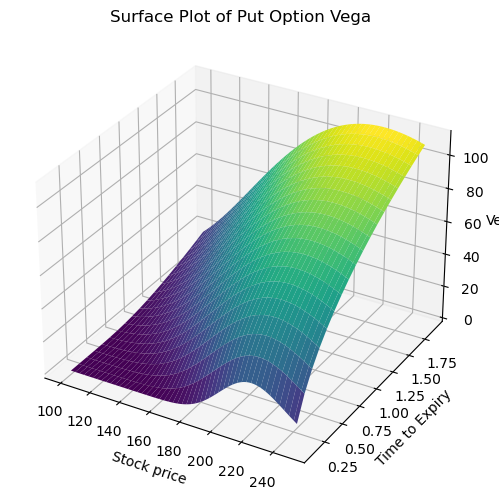

In [55]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import norm

stock_prices = np.arange(100, 250)
ttm = np.arange(0.1, 2.0, 0.1)
strike_price = 220
risk_free_rate = 0.04
volatility = 0.3

def vega(S, T):
    d1 = (np.log(S/strike_price)+(risk_free_rate+0.5*volatility**2)*T)/(volatility*np.sqrt(T))
    vega = S * np.sqrt(T) * norm.pdf(d1) 
    return vega

stock_grid, ttm_grid = np.meshgrid(stock_prices, ttm)
put_vega = vega(stock_grid, ttm_grid)
   
fig = plt.figure(figsize=(14, 6))
ax = plt.axes(projection='3d')

ax.plot_surface(stock_grid, ttm_grid, put_vega, cmap='viridis') 

ax.set_title('Surface Plot of Put Option Vega')
ax.set_xlabel('Stock price') 
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Vega')

plt.show()